## Import packages
Importing the required packages and setting the `seaborn` parameters to be used for data visualization.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

## Read dataset
Load the forest [fire dataset](http://archive.ics.uci.edu/ml/datasets/Forest+Fires) into the program to be used to train the machine learning model.

In [22]:
df = pd.read_csv('dataset_new.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Add new dataset column
Add `size_category` column to the dataset to classify the fires into either being a ***small fire (0)*** or ***large fire (1)***.

In [23]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,8,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,8,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,8,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,8,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,8,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,11,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


## Adjust day column
Replace the `day` column with a `is_weekend` column and change the values to match this change. Values of ***sat*** and ***sun*** will be ***True***. The rest if the days will be ***False***.

Text(0.5, 1.0, 'Count plot of weekend vs weekday')

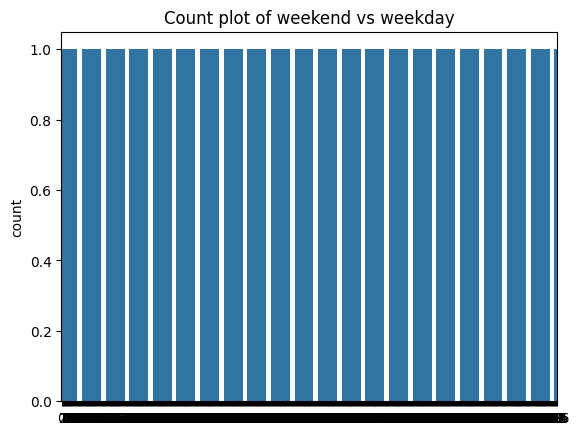

In [24]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

## Evening out the distribution
`rain` and `area` are too skewed and have significant outliers so we use logorithms to smooth out the distribution.

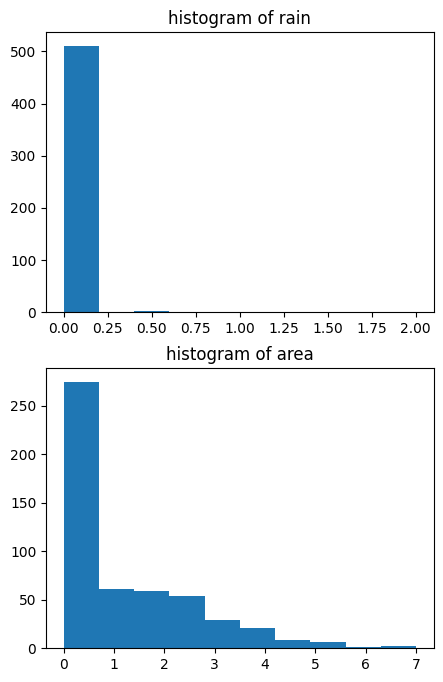

In [5]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

## Spliting the dataset
Splitting the dataset into 80% training data and 20% testing data at random.

In [6]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

## Feature Scaling
We use the StandardScaler to transform the model inputs or features.

In [7]:
# fitting scaler
sc_features = StandardScaler()# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.293766,-0.927776,0.672240,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.293766,-0.161993,0.672240,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-1.130796,0.603791,0.232536,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.712281,-0.161993,0.232536,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,0.124750,-0.161993,-2.405688,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923


## Building the base ANN
Defining the neural network structure and activation functions that make up the foundation of the machine learning model.

In [8]:
model = Sequential()# input layer + 1st hidden layer
model.add(Dense(6, input_dim=13, activation='relu'))# 2nd hidden layer
model.add(Dense(6, activation='relu'))# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

## Define model hyperparameters
Setting inital hyperparameters such as loss function and learning rate to optimize the model training process.

In [9]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5617 - loss: 1.2409 - val_accuracy: 0.7500 - val_loss: 0.5502
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 1.1159 - val_accuracy: 0.7596 - val_loss: 0.5080
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 1.0254 - val_accuracy: 0.7692 - val_loss: 0.4852
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7385 - loss: 0.9978 - val_accuracy: 0.7885 - val_loss: 0.4637
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.9510 - val_accuracy: 0.7885 - val_loss: 0.4456
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.9108 - val_accuracy: 0.7981 - val_loss: 0.4263
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.9657 - val_accuracy: 0.7981 - val_loss: 0.4095
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 0.9462 - val_accuracy: 0.8365 - v

## Evaluate training process
Assess how the traning process executed to determine if any hyperparamters have to be tweaked for better training.

In [10]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.985, Valid: 0.981


## Visualize training process
Plot how model accuracy got better over the course of the training and validation processes.

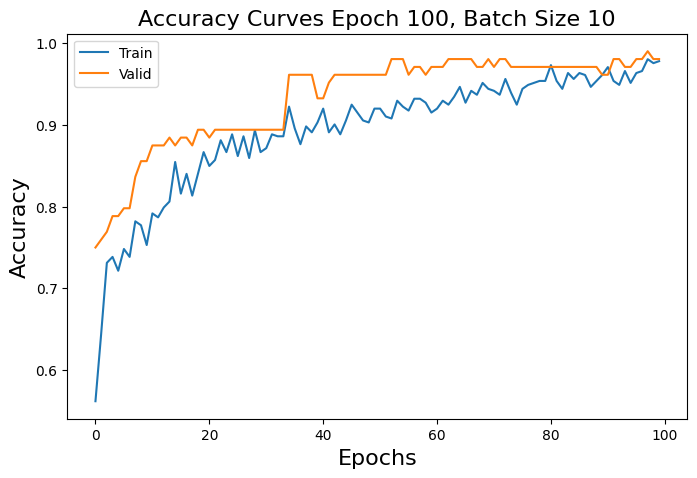

In [11]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

## Experimenting with another model and hyperparameters
Trying a new model that has different hyperparameters from the first model.

/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

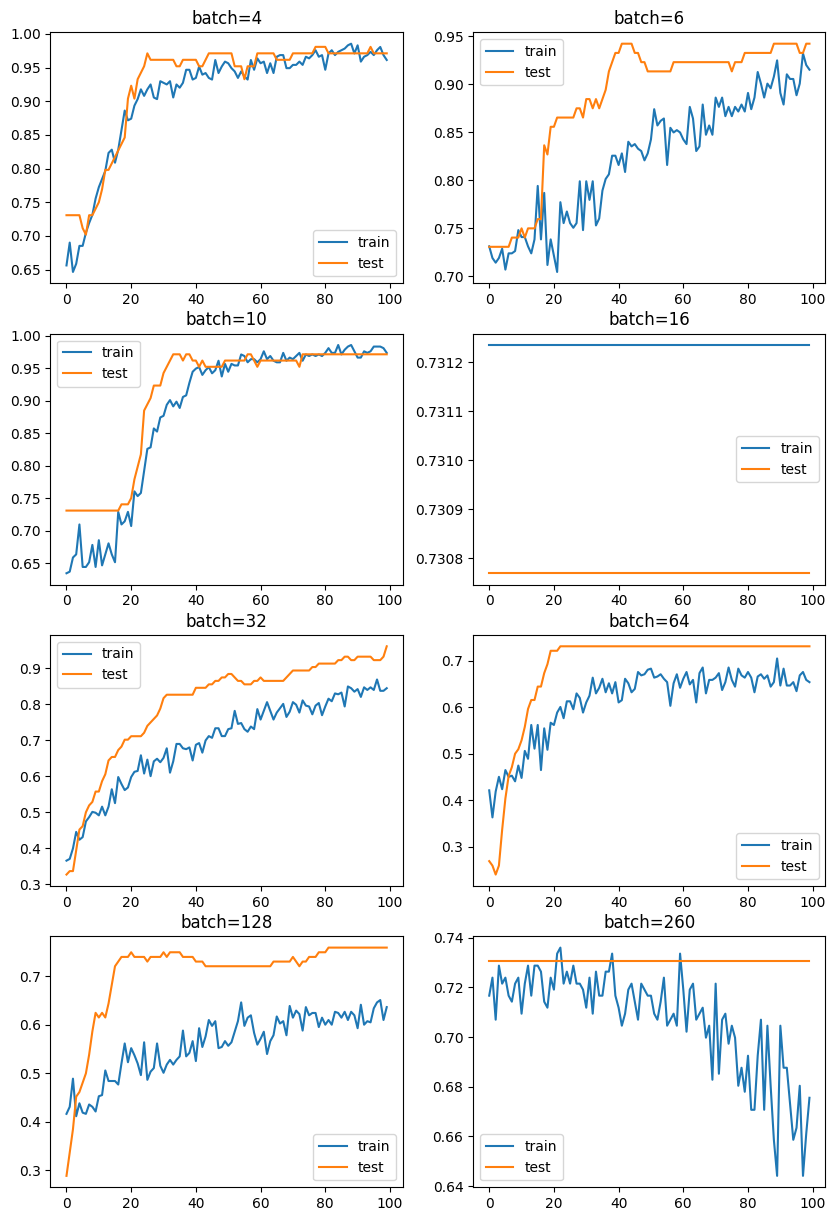

In [12]:
# Fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):# Define Model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))# Compile Model
    model.compile(optimizer = 'adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')# Fit Model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=n_batch)# Plot Learning Curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()# Create learning curves for different batch sizes
    
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):# Determine the Plot Number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)# Fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])# Show learning curves
plt.show()

## Experimenting with yet another model and hyperparameters
Trying a new model that has different hyperparameters from the first and second model.

/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

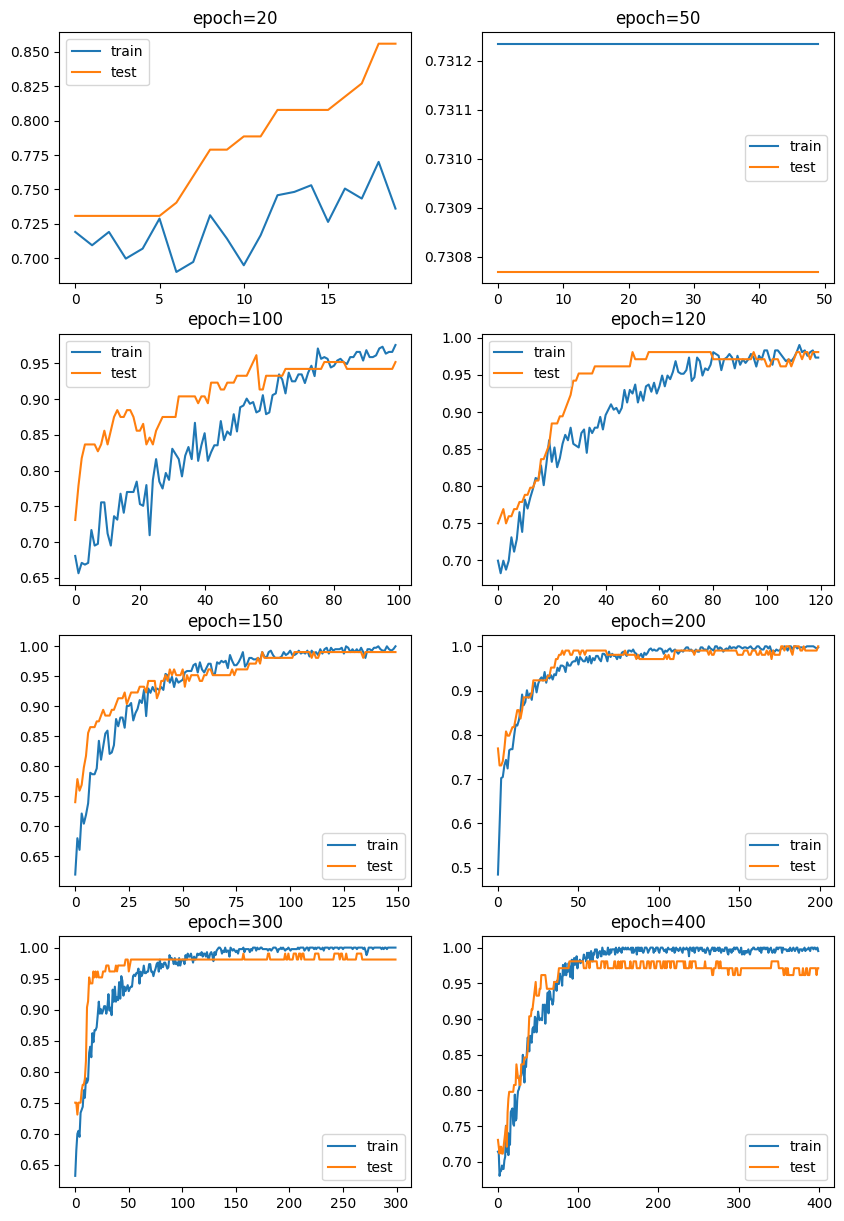

In [13]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_epoch):# define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))# compile model
    model.compile(optimizer ='adam', metrics=['accuracy'], loss = 'binary_crossentropy')# fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=6)# plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()# Create learning curves for different batch sizes

epochs = [20, 50, 100, 120, 150, 200, 300, 400]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):# Determine the Plot Number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)# Fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, epochs[i])# Show learning curves
plt.show()

## Experimenting with yet another model and hyperparameters
Trying a new model that has different hyperparameters from the first, second, and third model.

In [14]:
def init_model():# define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer ='adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')
    
    return model# init model

model = init_model()# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)# model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)# fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=6, callbacks=[es, mc])

/home/brian/code/lab10/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from None to 0.73077, saving model to best_model.h5



Epoch 2: val_accuracy did not improve from 0.73077

Epoch 3: val_accuracy did not improve from 0.73077

Epoch 4: val_accuracy did not improve from 0.73077

Epoch 5: val_accuracy did not improve from 0.73077

Epoch 6: val_accuracy did not improve from 0.73077

Epoch 7: val_accuracy did not improve from 0.73077

Epoch 8: val_accuracy did not improve from 0.73077

Epoch 9: val_accuracy did not improve from 0.73077

Epoch 10: val_accuracy improved from 0.73077 to 0.74038, saving model to best_model.h5



Epoch 11: val_accuracy did not improve from 0.74038

Epoch 12: val_accuracy improved from 0.74038 to 0.75962, saving model to best_model.h5



Epoch 13: val_accuracy improved from 0.75962 to 0.78846, saving model to best_model.h5



Epoch 14: val_accuracy improved from 0.78846 to 0.79808, saving model to best_model.h5



Epoch 15: val_accuracy did not improve from 0.79808

Epoch 16: val_accuracy improved from 0.79808 to 0.81731, saving model to best_model.h5



Epoch 17: val_accuracy improved from 0.81731 to 0.82692, saving model to best_model.h5



Epoch 18: val_accuracy improved from 0.82692 to 0.83654, saving model to best_model.h5



Epoch 19: val_accuracy did not improve from 0.83654

Epoch 20: val_accuracy improved from 0.83654 to 0.86538, saving model to best_model.h5



Epoch 21: val_accuracy improved from 0.86538 to 0.87500, saving model to best_model.h5



Epoch 22: val_accuracy improved from 0.87500 to 0.88462, saving model to best_model.h5



Epoch 23: val_accuracy did not improve from 0.88462

Epoch 24: val_accuracy did not improve from 0.88462

Epoch 25: val_accuracy did not improve from 0.88462

Epoch 26: val_accuracy did not improve from 0.88462

Epoch 27: val_accuracy improved from 0.88462 to 0.89423, saving model to best_model.h5



Epoch 28: val_accuracy improved from 0.89423 to 0.90385, saving model to best_model.h5



Epoch 29: val_accuracy improved from 0.90385 to 0.92308, saving model to best_model.h5



Epoch 30: val_accuracy did not improve from 0.92308

Epoch 31: val_accuracy did not improve from 0.92308

Epoch 32: val_accuracy did not improve from 0.92308

Epoch 33: val_accuracy improved from 0.92308 to 0.93269, saving model to best_model.h5



Epoch 34: val_accuracy did not improve from 0.93269

Epoch 35: val_accuracy did not improve from 0.93269

Epoch 36: val_accuracy did not improve from 0.93269

Epoch 37: val_accuracy did not improve from 0.93269

Epoch 38: val_accuracy did not improve from 0.93269

Epoch 39: val_accuracy did not improve from 0.93269

Epoch 40: val_accuracy improved from 0.93269 to 0.94231, saving model to best_model.h5



Epoch 41: val_accuracy did not improve from 0.94231

Epoch 42: val_accuracy did not improve from 0.94231

Epoch 43: val_accuracy did not improve from 0.94231

Epoch 44: val_accuracy did not improve from 0.94231

Epoch 45: val_accuracy did not improve from 0.94231

Epoch 46: val_accuracy did not improve from 0.94231

Epoch 47: val_accuracy did not improve from 0.94231

Epoch 48: val_accuracy did not improve from 0.94231

Epoch 49: val_accuracy did not improve from 0.94231

Epoch 50: val_accuracy did not improve from 0.94231

Epoch 51: val_accuracy did not improve from 0.94231

Epoch 52: val_accuracy did not improve from 0.94231

Epoch 53: val_accuracy did not improve from 0.94231

Epoch 54: val_accuracy did not improve from 0.94231

Epoch 55: val_accuracy improved from 0.94231 to 0.95192, saving model to best_model.h5



Epoch 56: val_accuracy did not improve from 0.95192

Epoch 57: val_accuracy did not improve from 0.95192

Epoch 58: val_accuracy did not improve from 0.95192

Epoch 59: val_accuracy did not improve from 0.95192

Epoch 60: val_accuracy did not improve from 0.95192

Epoch 61: val_accuracy did not improve from 0.95192

Epoch 62: val_accuracy did not improve from 0.95192

Epoch 63: val_accuracy did not improve from 0.95192

Epoch 64: val_accuracy did not improve from 0.95192

Epoch 65: val_accuracy did not improve from 0.95192

Epoch 66: val_accuracy did not improve from 0.95192

Epoch 67: val_accuracy did not improve from 0.95192

Epoch 68: val_accuracy did not improve from 0.95192

Epoch 69: val_accuracy did not improve from 0.95192

Epoch 70: val_accuracy did not improve from 0.95192

Epoch 71: val_accuracy did not improve from 0.95192

Epoch 72: val_accuracy did not improve from 0.95192

Epoch 73: val_accuracy did not improve from 0.95192

Epoch 74: val_accuracy did not improve from 0


Epoch 89: val_accuracy did not improve from 0.96154

Epoch 90: val_accuracy did not improve from 0.96154

Epoch 91: val_accuracy did not improve from 0.96154

Epoch 92: val_accuracy did not improve from 0.96154

Epoch 93: val_accuracy did not improve from 0.96154

Epoch 94: val_accuracy did not improve from 0.96154

Epoch 95: val_accuracy did not improve from 0.96154

Epoch 96: val_accuracy did not improve from 0.96154

Epoch 97: val_accuracy did not improve from 0.96154

Epoch 98: val_accuracy did not improve from 0.96154

Epoch 99: val_accuracy did not improve from 0.96154

Epoch 100: val_accuracy did not improve from 0.96154

Epoch 101: val_accuracy did not improve from 0.96154

Epoch 102: val_accuracy did not improve from 0.96154

Epoch 103: val_accuracy did not improve from 0.96154

Epoch 104: val_accuracy did not improve from 0.96154

Epoch 105: val_accuracy did not improve from 0.96154

Epoch 106: val_accuracy did not improve from 0.96154

Epoch 107: val_accuracy improved from 


Epoch 108: val_accuracy did not improve from 0.97115

Epoch 109: val_accuracy did not improve from 0.97115

Epoch 110: val_accuracy did not improve from 0.97115

Epoch 111: val_accuracy did not improve from 0.97115

Epoch 112: val_accuracy did not improve from 0.97115

Epoch 113: val_accuracy did not improve from 0.97115

Epoch 114: val_accuracy did not improve from 0.97115

Epoch 115: val_accuracy did not improve from 0.97115

Epoch 116: val_accuracy did not improve from 0.97115

Epoch 117: val_accuracy did not improve from 0.97115

Epoch 118: val_accuracy did not improve from 0.97115

Epoch 119: val_accuracy did not improve from 0.97115

Epoch 120: val_accuracy did not improve from 0.97115

Epoch 121: val_accuracy did not improve from 0.97115

Epoch 122: val_accuracy did not improve from 0.97115

Epoch 123: val_accuracy did not improve from 0.97115

Epoch 124: val_accuracy did not improve from 0.97115

Epoch 125: val_accuracy did not improve from 0.97115

Epoch 126: val_accuracy did


Epoch 164: val_accuracy did not improve from 0.98077

Epoch 165: val_accuracy did not improve from 0.98077

Epoch 166: val_accuracy did not improve from 0.98077

Epoch 167: val_accuracy did not improve from 0.98077

Epoch 168: val_accuracy did not improve from 0.98077

Epoch 169: val_accuracy did not improve from 0.98077

Epoch 170: val_accuracy did not improve from 0.98077

Epoch 171: val_accuracy did not improve from 0.98077

Epoch 172: val_accuracy did not improve from 0.98077

Epoch 173: val_accuracy did not improve from 0.98077

Epoch 174: val_accuracy did not improve from 0.98077

Epoch 175: val_accuracy did not improve from 0.98077

Epoch 176: val_accuracy did not improve from 0.98077

Epoch 177: val_accuracy did not improve from 0.98077

Epoch 178: val_accuracy did not improve from 0.98077

Epoch 179: val_accuracy did not improve from 0.98077

Epoch 180: val_accuracy did not improve from 0.98077

Epoch 181: val_accuracy did not improve from 0.98077

Epoch 182: val_accuracy did

## Visualizing the final training process
Plotting the loss curves from the training and validating process.

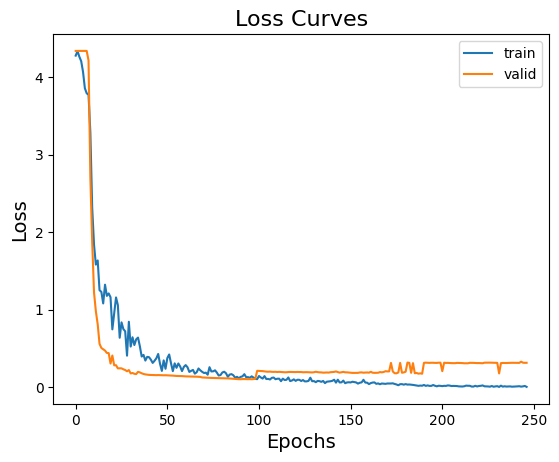

In [15]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

## Visualizing the final training process
Plotting the accuracy curves from the training and validating process.

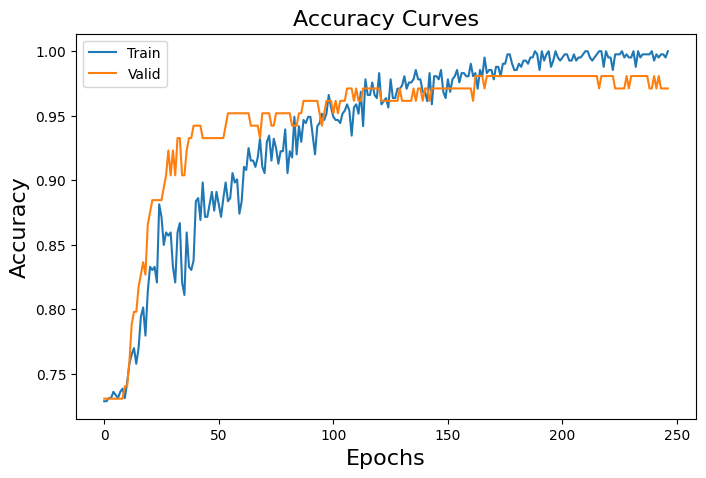

In [16]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

## Final evaluation
Assess how the training process of the final model executed given its hyperparameters.

In [17]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.971
